In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
data=pd.read_csv("C:\\Users\\Sathya Sai\\Downloads\\Placement_Data_Full_Class.csv")
data.set_index("sl_no")

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [3]:
#searching for the missing data
#OBSERVATION-->TOTAL NUMBER OF PEOPLE WHO ARE NOT PLACED

data.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
f=data.groupby('status').sum()
f

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,,
Not Placed,7402,3855.45,3912.50,4095.99,4662.39,4128.06,0.0
Placed,15818,10614.78,10349.13,10173.60,10839.23,9261.75,42721000.0


In [5]:
#avereage salary
data[data["status"]=="Placed"]["salary"].mean()

288655.4054054054

<AxesSubplot:>

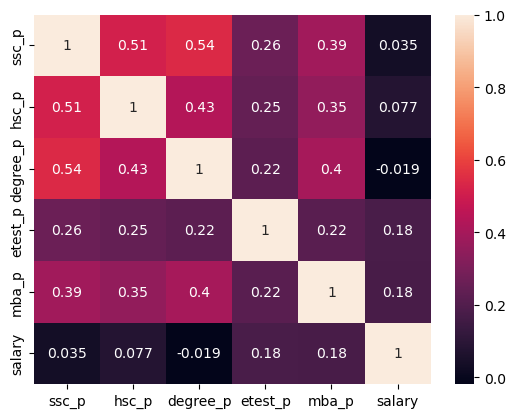

In [6]:
#finding correlation among the attributes
visual=data.iloc[:,1:]
sns.heatmap(visual.corr(),annot=True)

In [7]:
temp=data[data["status"]=="Placed"]["mba_p"].min()

In [8]:
temp


52.38

In [9]:
mba_notplaced=data[data["status"]=="Not Placed"]["mba_p"].max()

In [10]:
mba_notplaced

75.71

In [11]:
data[data["status"]=="Placed"]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [12]:
print("STUDENTS WHO ARE PLACED AND THIER SSC DEGREES")
print(data[data["status"]=="Placed"]["ssc_b"].value_counts())
print("\n\nSTUDENTS WHO ARE NOT PLACED AND THIER SSC DEGREES")
print(data[data["status"]=="Not Placed"]["ssc_b"].value_counts())

STUDENTS WHO ARE PLACED AND THIER SSC DEGREES
Central    78
Others     70
Name: ssc_b, dtype: int64


STUDENTS WHO ARE NOT PLACED AND THIER SSC DEGREES
Central    38
Others     29
Name: ssc_b, dtype: int64


(array([ 5.,  7., 22., 19., 43., 32., 29., 26., 22., 10.]),
 array([40.89 , 45.741, 50.592, 55.443, 60.294, 65.145, 69.996, 74.847,
        79.698, 84.549, 89.4  ]),
 <BarContainer object of 10 artists>)

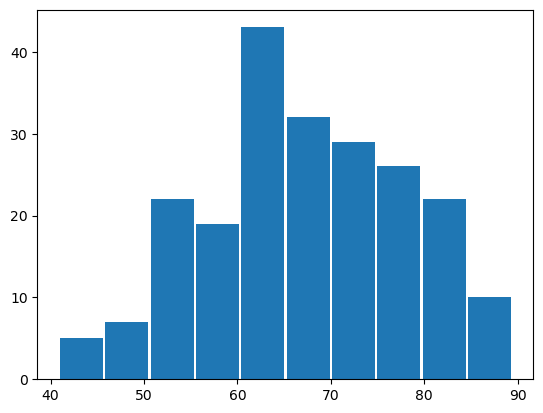

In [13]:
plt.hist(data["ssc_p"],rwidth=0.95)

In [14]:
print("STUDENTS WHO ARE PLACED AND THIER DEGREES")
print(data[data["status"]=="Placed"]["degree_t"].value_counts())
print("\n\nSTUDENTS WHO ARE NOT PLACED AND THIER  DEGREES")
print(data[data["status"]=="Not Placed"]["degree_t"].value_counts())

STUDENTS WHO ARE PLACED AND THIER DEGREES
Comm&Mgmt    102
Sci&Tech      41
Others         5
Name: degree_t, dtype: int64


STUDENTS WHO ARE NOT PLACED AND THIER  DEGREES
Comm&Mgmt    43
Sci&Tech     18
Others        6
Name: degree_t, dtype: int64


(array([10., 25., 26., 58., 35., 34., 16.,  7.,  3.,  1.]),
 array([50. , 54.1, 58.2, 62.3, 66.4, 70.5, 74.6, 78.7, 82.8, 86.9, 91. ]),
 <BarContainer object of 10 artists>)

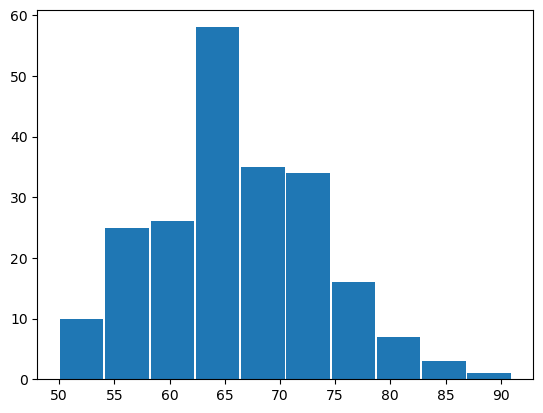

In [15]:
plt.hist(data["degree_p"],rwidth=0.96)

In [16]:
print("STUDENTS WHO ARE PLACED AND THIER HSC DEGREES")
print(data[data["status"]=="Placed"]["hsc_b"].value_counts())
print("\n\nSTUDENTS WHO ARE NOT PLACED AND THIER HSC DEGREES")
print(data[data["status"]=="Not Placed"]["hsc_b"].value_counts())

STUDENTS WHO ARE PLACED AND THIER HSC DEGREES
Others     91
Central    57
Name: hsc_b, dtype: int64


STUDENTS WHO ARE NOT PLACED AND THIER HSC DEGREES
Others     40
Central    27
Name: hsc_b, dtype: int64


(array([ 5.,  7., 17., 32., 68., 37., 28.,  8., 10.,  3.]),
 array([37.  , 43.07, 49.14, 55.21, 61.28, 67.35, 73.42, 79.49, 85.56,
        91.63, 97.7 ]),
 <BarContainer object of 10 artists>)

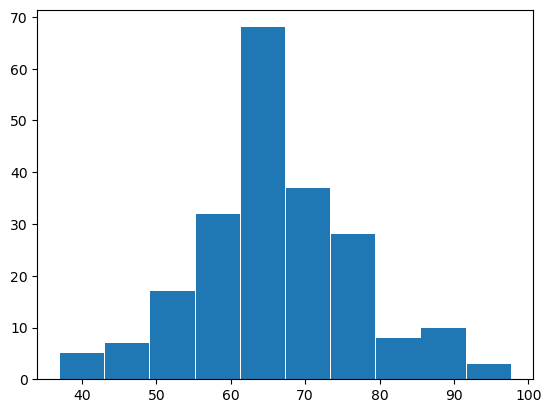

In [17]:
plt.hist(data["hsc_p"],rwidth=0.98)

Comm&Mgmt    102
Sci&Tech      41
Others         5
Name: degree_t, dtype: int64


Text(0.5, 1.0, 'VISUALIZATION OF THE EFFECT OF DEGREE ON PLACEMENT ')

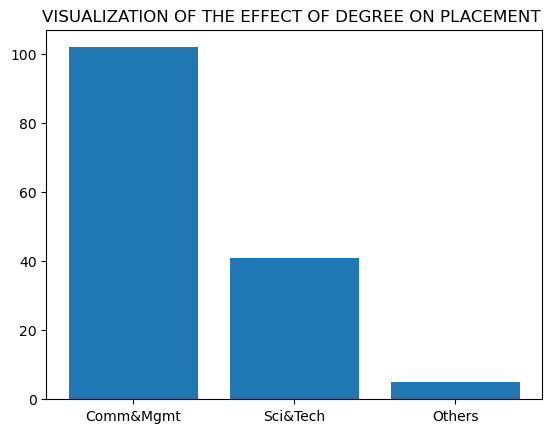

In [18]:
print(data[data["status"]=="Placed"]["degree_t"].value_counts())
plt.bar(["Comm&Mgmt","Sci&Tech","Others" ],data[data["status"]=="Placed"]["degree_t"].value_counts())
plt.title("VISUALIZATION OF THE EFFECT OF DEGREE ON PLACEMENT ")
#OBSERVATION-->COMM&MGMT HAS HIGHER IMPORTANCE

Comm&Mgmt    43
Sci&Tech     18
Others        6
Name: degree_t, dtype: int64


<BarContainer object of 3 artists>

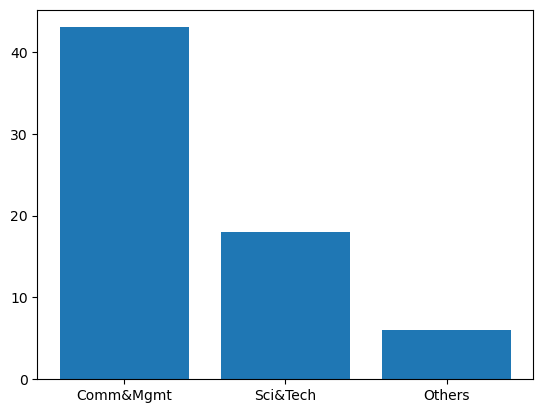

In [19]:
#deg_t=data["degree_t"].unique()
print(data[data["status"]=="Not Placed"]["degree_t"].value_counts())
plt.bar(["Comm&Mgmt","Sci&Tech","Others" ],data[data["status"]=="Not Placed"]["degree_t"].value_counts())


Mkt&Fin    95
Mkt&HR     53
Name: specialisation, dtype: int64


Text(0.5, 1.0, 'VISUALIZATION OF THE EFFECT OF SPECIALIZATION ON PLACEMENT ')

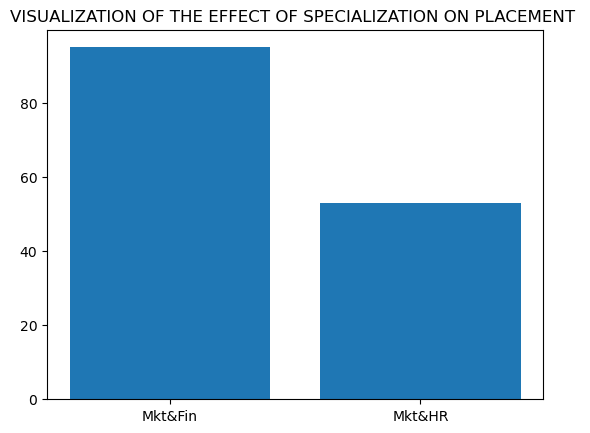

In [20]:
print(data[data["status"]=="Placed"]["specialisation"].value_counts())
plt.bar(["Mkt&Fin","Mkt&HR"],data[data["status"]=="Placed"]["specialisation"].value_counts())
plt.title("VISUALIZATION OF THE EFFECT OF SPECIALIZATION ON PLACEMENT ")
#OBSERVATION-->Mkt&Fin SPECIALIZATION IS VERY HELPFUL IN PLACEMENTS.

Mkt&HR     42
Mkt&Fin    25
Name: specialisation, dtype: int64


<BarContainer object of 2 artists>

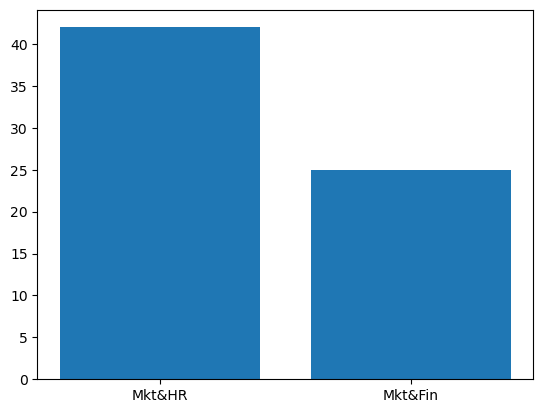

In [21]:
print(data[data["status"]=="Not Placed"]["specialisation"].value_counts())
plt.bar(["Mkt&HR","Mkt&Fin"],data[data["status"]=="Not Placed"]["specialisation"].value_counts())


NUMBER OF MALES WHO GOT PLACED=100
NUMBER OF FEMALES WHO GOT PLACED=48


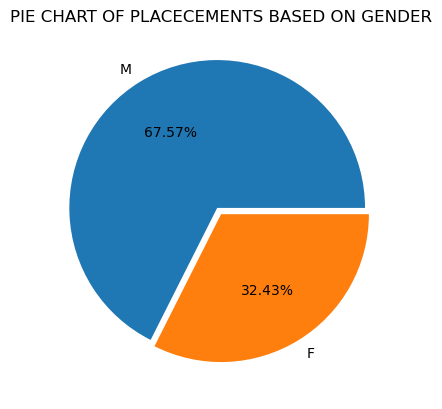

In [22]:
cpm,cpf=0,0
for i in data["gender"][data["status"]=="Placed"]:
    if i=="M":
        cpm+=1
    else:
        cpf+=1

        
print(f"NUMBER OF MALES WHO GOT PLACED={cpm}")
print(f"NUMBER OF FEMALES WHO GOT PLACED={cpf}")

plt.pie([cpm,cpf],labels=["M","F"],explode=[0.05,0],autopct='%.2f%%')
plt.title("PIE CHART OF PLACECEMENTS BASED ON GENDER")
plt.show()
#OBSERVATION:MOSTLY MALES ARE GETTING PLACED       

NUMBER OF MALES WHO GOT PLACED=39
NUMBER OF FEMALES WHO GOT PLACED=28


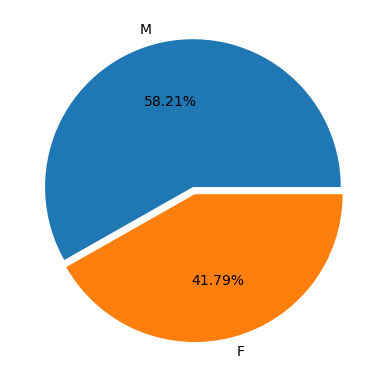

In [23]:
cnpm,cnpf=0,0
for i in data["gender"][data["status"]=="Not Placed"]:
    if i=="M":
        cnpm+=1
    else:
        cnpf+=1

        
print(f"NUMBER OF MALES WHO GOT PLACED={cnpm}")
print(f"NUMBER OF FEMALES WHO GOT PLACED={cnpf}")

plt.pie([cnpm,cnpf],labels=["M","F"],explode=[0.05,0],autopct='%.2f%%')
plt.show()
        


In [24]:
print("STUDENTS WHO ARE PLACED AND THIER HSC DEGREES")
print(data[data["status"]=="Placed"]["hsc_s"].value_counts())
print("\n\nSTUDENTS WHO ARE NOT PLACED AND THIER HSC DEGREES")
print(data[data["status"]=="Not Placed"]["hsc_s"].value_counts())

STUDENTS WHO ARE PLACED AND THIER HSC DEGREES
Commerce    79
Science     63
Arts         6
Name: hsc_s, dtype: int64


STUDENTS WHO ARE NOT PLACED AND THIER HSC DEGREES
Commerce    34
Science     28
Arts         5
Name: hsc_s, dtype: int64


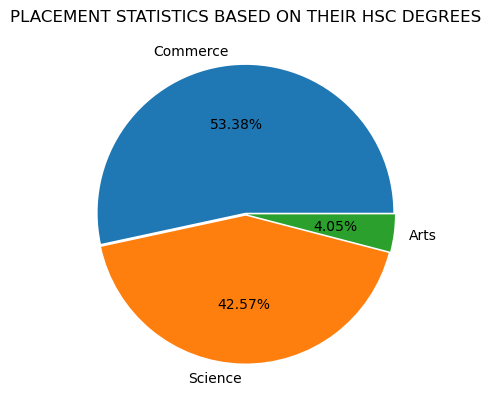

In [25]:
plt.title("PLACEMENT STATISTICS BASED ON THEIR HSC DEGREES")
plt.pie(data[data["status"]=="Placed"]["hsc_s"].value_counts(),labels=["Commerce","Science","Arts"],explode=[0.01,0.01,0.01],autopct='%.2f%%')
plt.show()
#OBSERVATION-->BEST:COMMERCE

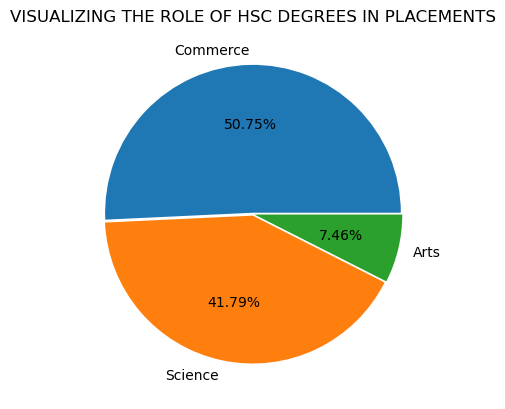

In [26]:
plt.title("VISUALIZING THE ROLE OF HSC DEGREES IN PLACEMENTS")
plt.pie(data[data["status"]=="Not Placed"]["hsc_s"].value_counts(),labels=["Commerce","Science","Arts"],explode=[0.01,0.01,0.01],autopct='%.2f%%')
plt.show()


In [27]:
data[data["salary"]==data["salary"].max()]
#observation--->max_salary-->Commerce,Comm&Mgmt,Mkt&Fin.

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0


def create_dataset(path):
    dataset=[]
    with open (path,'r+') as file:
        lines=file.readlines()
        
    header=headers(lines[0])
    
    for i in lines[1:]:
        val=input_data(i)
        di=append_column_data(header,val)
        dataset.append(di)
    
    return dataset

def append_column_data(header,data):
    dict={}
    for i,j in zip(header,data):
        dict[i]=j
    return dict

def input_data(data):
    list=[]
    for i in data.strip().split(','):
             list.append(i)
    return list


def headers(header):
    return header.strip().split(",")
#title=headers(lines[0])

da=create_dataset("C:\\Users\\Sathya Sai\\Downloads\\Placement_Data_Full_Class.csv")